In [55]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [59]:
# uplink case
LTE = 0
NR = 1

select = 0

if select == LTE:
    f = open('uplink_data/uplink_pixel3sktlte.pickle', 'rb')
elif select == NR:
    f = open('uplink_data/uplink_xiaomi5g10.pickle', 'rb')
loaded_data = pickle.load(f)

In [31]:
# downlink case
f = open('downlink_data/downlink.pickle', 'rb')
loaded_data = pickle.load(f)

In [60]:
file_size_list = [10, 100, 1000, 10000]
interval_list = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]

file_len = len(file_size_list)
interval_len = len(interval_list)

bw =0

if select == LTE:
    bw = 27.3
elif select == NR:
    bw =38.3


plot_data = np.zeros([file_len, interval_len, 7])

for i, file_size in enumerate(file_size_list):
    for j, interval in enumerate(interval_list):
        if interval == 20000:
            interval = 11000
        key_string = str(file_size) + '_' + str(interval)
        try:
            element = loaded_data[key_string]

            first_tx_time = element['first tx time']
            first_init_time = element['first init time']
            first_throughput = file_size*8*1024/(first_tx_time/1e3)

            mean_tx_time = element['mean upload time']
            mean_init_time = element['mean initial latency']
            mean_throughput = element['mean throughput']
            std_throughput = element['std throughput']
            
            plot_data[i,j,0] = first_tx_time
            plot_data[i,j,1] = first_init_time
            plot_data[i,j,2] = first_throughput 
            plot_data[i,j,3] = mean_tx_time
            plot_data[i,j,4] = mean_init_time
            plot_data[i,j,5] = mean_throughput
            plot_data[i,j,6] = std_throughput
            
        except:
            print('No measurement results '+str(file_size)+' '+str(interval))
            plot_data[i,j,0] = first_tx_time
            plot_data[i,j,1] = first_init_time
            plot_data[i,j,2] = first_throughput 
            plot_data[i,j,3] = mean_tx_time
            plot_data[i,j,4] = mean_init_time
            plot_data[i,j,5] = mean_throughput
            plot_data[i,j,6] = std_throughput

Selection is  0


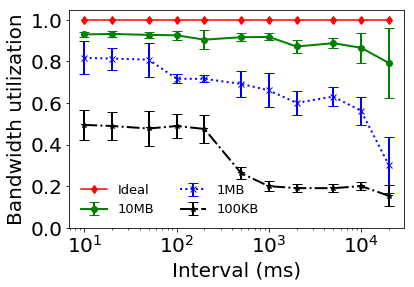

In [61]:
## Goodput vs. Traffic pattern

linestyle_arr = ['-', ':', '-.', '--']
marker_arr = ['o', 'x', '*', '']
color_arr = ['g', 'b', 'black']

print('Selection is ', select)

bw = 0

#27,3 -> lte, 
if select == LTE:
    plt.plot(interval_list, np.ones(len(interval_list)), marker = 'd', color = 'r') #-77dbm skt lte
    bw = 27.3
elif select == NR:
    plt.plot(interval_list, np.ones(len(interval_list)), marker = 'd', color = 'r') #-86dbm skt 5g
    bw =38.3

for i in range(3):
    index = 3-i
    plt.errorbar(interval_list, plot_data[index,:,5]/bw, yerr = plot_data[index,:,6]/bw, linestyle =linestyle_arr[i], linewidth = 2, 
                marker = marker_arr[i], capsize = 5, color = color_arr[i])
plt.xscale("log")
plt.ylabel("Bandwidth utilization", size = 20)
plt.xlabel("Interval (ms)", size = 20)
#plt.ylim([-0.5, 29.5])
#plt.yscale('log')
plt.xticks(size =20)

if select == LTE:
    plt.legend(['Ideal', '10MB', '1MB', '100KB', '10KB'], ncol = 2, fontsize = 13, frameon = False)#, loc = 'upper left', bbox_to_anchor=(1.0, 1.0))
    plt.yticks(np.arange(0,1.05,0.2),size =20)
    plt.savefig('paper_figures/lte_goodput.pdf', format = 'pdf',  bbox_inches='tight')
elif select == NR:
    plt.yticks(np.arange(0,1.05,0.2),size =20)
    #plt.yticks(size =20)
    plt.savefig('paper_figures/nr_goodput.pdf', format = 'pdf',  bbox_inches='tight')


In [53]:
plot_data[index,:,5]/bw

array([0.27752635, 0.29002865, 0.2427339 , 0.23476916, 0.21801455,
       0.14057913, 0.11698689, 0.11430097, 0.10429558, 0.09041015,
       0.05665318])

In [161]:
plot_data[3,:,5]*31.2/25.38
plot_data[3,:, 6]*31.2/25.38

array([31.20231211, 31.27730798, 31.12523195, 31.05997222, 30.35496034,
       30.75106289, 30.8034791 , 29.2574285 , 29.78316036, 29.05113792,
       26.60304322])

In [171]:
plot_data[3,:,5] = [31.20231211, 31.27730798, 31.12523195, 31.05997222, 30.35496034,
       30.75106289, 30.8034791 , 29.2574285 , 29.78316036, 29.05113792,
       26.60304322]
plot_data[3,:,6] =[0.37559974, 0.39029548, 0.44027733, 0.59118662, 1.24152078,
       0.53186797, 0.46583624, 0.89270249, 0.69296993, 1.95201979,
       4.63007541]

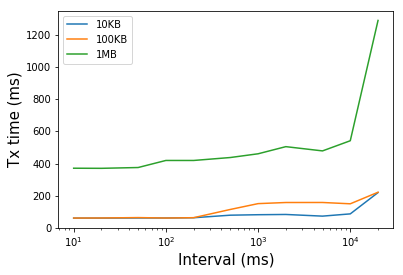

In [67]:
## Goodput vs. Traffic pattern

for i in range(3):
    plt.plot(interval_list,plot_data[i,:,3])
plt.xscale("log")
plt.ylabel("Tx time (ms)", size = 15)
plt.xlabel("Interval (ms)", size = 15)
plt.legend(['10KB', '100KB', '1MB', '10MB'])

In [14]:
plot_data[2,:,3]

array([ 286.78,  180.67,  217.67,  254.78,  213.  ,  529.67,  562.78,
        584.89,  542.89,  600.33,  555.78, 2062.89, 2285.89])

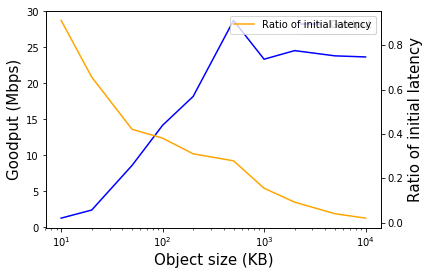

In [13]:
## Goodput and initial latency ratio vs.Object size

fig1, ax1 = plt.subplots()
plt.xscale("log")
plt.xlabel("Object size (KB)", size = 15)

ax1.plot(file_size_list,plot_data[:,0,5], c = 'blue')
ax1.set_ylabel('Goodput (Mbps)', size = 15)
ax1.legend(['Goodput'])

ax2 = ax1.twinx()
ax2.plot(file_size_list,plot_data[:,0,1]/plot_data[:,0,0], c = 'orange')
ax2.set_ylabel('Ratio of initial latency', size = 15)
ax2.legend(['Ratio of initial latency'])

Text(0.5,0,'Interval (ms)')

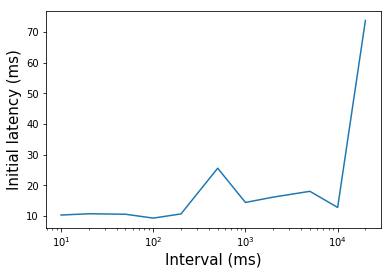

In [104]:
## Initial latency vs. interval

plt.plot(interval_list,plot_data[1,:,4])
plt.xscale("log")
plt.ylabel("Initial latency (ms)", size = 15)
plt.xlabel("Interval (ms)", size = 15)

In [46]:
## ping vs. interval

interval = [10, 20 , 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]

lte_skt_minRTT = 21
lte_skt_mean = [37, 38, 37, 39, 48, 51, 47, 48, 49, 49, 129]
lte_skt_std = [7.7,15.1,7.2,10.8,13,7.1,11.3,11.9,20,13.8,45.9]

lte_lg_minRTT = 26
lte_lg_mean = [38,40,38,40,49,48,49,49,50,50,140]
lte_lg_std = [8.7, 13.6, 5.2, 5.7, 14.5, 8.4, 14.3, 21.1, 13.8, 25.2]

fiveG_skt_minRTT = 22
fiveG_skt_mean = [29, 31, 35, 45, 47, 45, 44, 45, 44, 60, 137]
fiveG_skt_std = [4.1, 4.6, 8.8, 6.7, 7.3, 8.4, 10.1, 20.2, 6.3, 10.2, 77] 

fiveG_lg_minRTT = 12
fiveG_lg_mean = [18, 19, 19, 18, 28, 32, 32, 34, 33, 37, 144]
fiveG_lg_std = [3.9, 4.2, 4, 4.6, 8.5, 12.8, 7.8, 15.7, 6.2, 16, 56.3]

ping_plot = [[] for _ in range(4)]
ping_plot[0] = lte_skt_mean
ping_plot[1] = lte_lg_mean
ping_plot[2] = fiveG_skt_mean
ping_plot[3] = fiveG_lg_mean

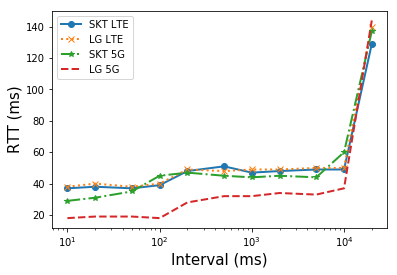

In [47]:
## ping vs. interval plot

for i in range(4):
    plt.plot(interval, ping_plot[i], linestyle =linestyle_arr[i], linewidth = 2, 
                marker = marker_arr[i])

plt.legend(['SKT LTE', 'LG LTE', 'SKT 5G', 'LG 5G'])
plt.xscale('log')
plt.ylabel("RTT (ms)", size = 15)
plt.xlabel("Interval (ms)", size = 15)
plt.savefig('paper_figures/initial_rtt.pdf', format = 'pdf',  bbox_inches='tight')

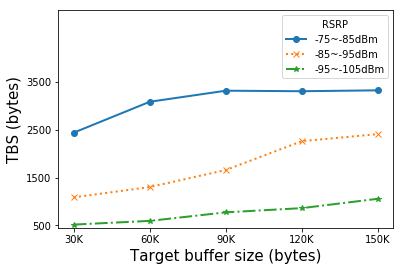

In [132]:
## BSR vs. throughput

linestyle_arr = ['-', ':', '-.', '--']
marker_arr = ['o', 'x', '*', '']

x = ['30K', '60K', '90K', '120K', '150K']
y = [[] for _ in range(3)]

y[0] = np.array([12200, 15437, 16594, 16540, 16633])/5
y[1] = np.array([5436, 6513, 8299, 11316, 12054])/5
y[2] = np.array([2585, 2974, 3867, 4309, 5288])/5

for i in range(len(y)):
    plt.plot(x, y[i], linestyle =linestyle_arr[i], linewidth = 2, 
                marker = marker_arr[i])

plt.ylabel("TBS (bytes)", size = 15)
plt.xlabel("Target buffer size (bytes)", size = 15)
plt.ylim([450,5000])
plt.yticks(range(500, 4000, 1000))
l = plt.legend(['-75~-85dBm', '-85~-95dBm', '-95~-105dBm'],loc = 'upper right')
l.set_title('RSRP')

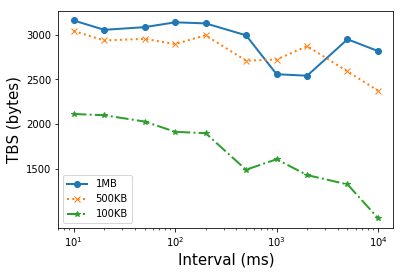

In [191]:
## Interval vs. throughput

interval_list = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
y = [[] for _ in range(3)]
y[0] = [3160, 3055, 3085, 3139, 3127, 2994, 2559, 2542, 2949, 2818] #1000
y[1] = [3042, 2936, 2954, 2897, 2994, 2710, 2723, 2873, 2590, 2375]
y[2] = [2114, 2100, 2030, 1915, 1899,1491,1608,1431, 1327, 950] #100


for i in range(len(y)):
    plt.plot(interval_list, y[i], linestyle =linestyle_arr[i], linewidth = 2, marker = marker_arr[i])
plt.xscale("log")
plt.ylabel("TBS (bytes)", size = 15)
plt.xlabel("Interval (ms)", size = 15)
plt.yticks(range(1500, 3300, 500))
l = plt.legend(['1MB', '500KB', '100KB'],loc = 'lower left')

In [ ]:
## Interval vs. throughput multi flow


interval_list = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
y = [[] for _ in range(3)]
y[0] = [3160, 3055, 3085, 3139, 3127, 2994, 2559, 2542, 2949, 2818] #1000
y[1] = [3042, 2936, 2954, 2897, 2994, 2710, 2723, 2873, 2590, 2375]
y[2] = [2114, 2100, 2030, 1915, 1899,1491,1608,1431, 1327, 950] #100


for i in range(len(y)):
    plt.plot(interval_list, y[i], linestyle =linestyle_arr[i], linewidth = 2, marker = marker_arr[i])
plt.xscale("log")
plt.ylabel("TBS (bytes)", size = 15)
plt.xlabel("Interval (ms)", size = 15)
plt.yticks(range(1500, 3300, 500))
l = plt.legend(['1MB', '500KB', '100KB'],loc = 'lower left')

In [ ]:
## scheduling latency of 4G



In [ ]:
## Figure1 . static vs. mobile

